**DATA**

In [170]:
import numpy as np#import the required model.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [171]:
rent=pd.read_csv('House_Rent_Dataset.csv')
rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


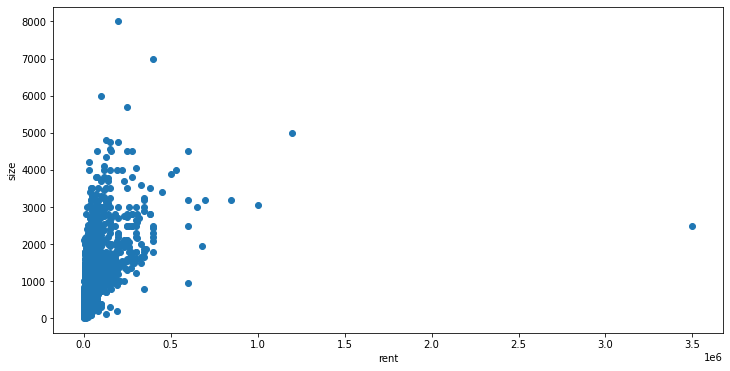

In [172]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(rent['Rent'], rent['Size'])
ax.set_xlabel('rent')
ax.set_ylabel('size')
plt.show()

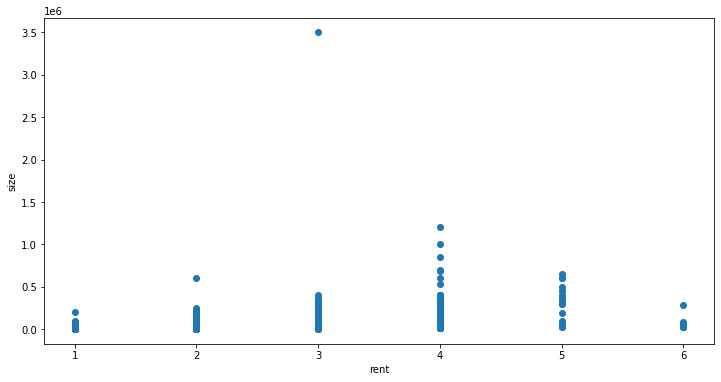

In [173]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(rent['BHK'], rent['Rent'])
ax.set_xlabel('rent')
ax.set_ylabel('size')
plt.show()

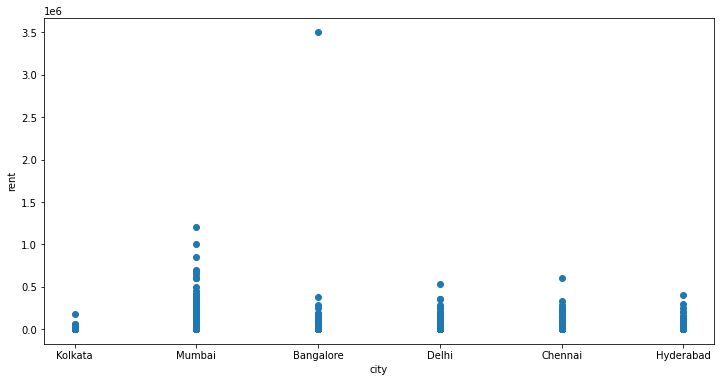

In [176]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(rent['City'], rent['Rent'])
ax.set_xlabel('city')
ax.set_ylabel('rent')
plt.show()

In [126]:
rent.shape#check the how many column and row availabel

(4746, 12)

In [178]:
rent=rent.drop(columns='Posted On')
rent=rent.drop(columns=['Area Locality'])

BHK COLUMN

In [180]:
rent.BHK[0]#data type is int is so need to change

2

In [181]:
sum(rent.BHK.isnull())#No Null values

0

In [182]:
rent.BHK.describe()#for my Knowedge there is no outlier

count    4746.000000
mean        2.083860
std         0.832256
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: BHK, dtype: float64

RENT COLUMN

In [183]:
sum(rent.Rent.isnull())#No Null Values

0

In [184]:
rent.Rent[0]#data type is int

10000

In [185]:
rent.Rent.describe()#no outlier found

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

SIZE COLUMN

In [186]:
rent.Size[0]#int data type

1100

In [187]:
sum(rent.Size.isnull())#No null values

0

In [188]:
rent.Size.describe()#Hear there is a outlier but it is good.

count    4746.000000
mean      967.490729
std       634.202328
min        10.000000
25%       550.000000
50%       850.000000
75%      1200.000000
max      8000.000000
Name: Size, dtype: float64

FLOOR COLUMN

In [189]:
rent.Floor[0]#here  is string 

'Ground out of 2'

In [190]:
rent = rent.join(rent['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Floor Max'}))
rent['Floor Level'] = rent.apply(lambda x: 0 if x['Floor Level'] =='Ground' \
                               else ( -1 if x['Floor Level'] =='Lower Basement' else (x['Floor Max']) ) , axis=1)


In [191]:
rent

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Floor Max
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,2
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,5
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,4,4
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,5,5
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,34,34


In [192]:
rent = rent.dropna()
rent['Floor Level'] = rent['Floor Level'].astype(int)
rent['Floor Max'] = rent['Floor Max'].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [193]:
rent=rent.drop(['Floor'],axis=1)#drop the floor column

In [196]:
rent.describe()

,BHK,Rent,Size,Bathroom,Floor_Level,Floor_Max
count,4742.000000,4.742000e+03,4742.000000,4742.000000,4742.000000,4742.000000
mean,2.083720,3.500863e+04,967.669970,1.966048,6.452763,6.973429
std,0.832245,7.813758e+04,634.355762,0.884555,9.722569,9.469727
min,1.000000,1.200000e+03,10.000000,1.000000,-1.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,2.000000,2.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,4.000000,4.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000,6.000000,6.000000
max,6.000000,3.500000e+06,8000.000000,10.000000,89.000000,89.000000


In [197]:
rent=rent.rename(columns={'Area Type':'Area_Type','Furnishing Status':'Furnishing_Status',
       'Tenant Preferred':'Tenant_Preferred', 'Floor Level':'Floor_Level', 'Floor Max':'Floor_Max', 'Point of Contact':'Point_of_Contact'}) #Rename the column Names

Area_Type columns

In [198]:
rent.Area_Type[0]#data type is string

'Super Area'

In [150]:
rent.City.unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [151]:
rent.Tenant_Preferred.unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [152]:
rent.Point_of_Contact.unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [201]:
rent["Area_Type"]=rent["Area_Type"].map({"Super Area":0,"Carpet Area":1,"Built Area":3})#using map function to change categorical data to Numeric
rent["City"]=rent["City"].map({"Kolkata":1,"Mumbai":2,"Bangalore":3,"Delhi":4,"Chennai":5,"Hyderabad":6})
rent["Furnishing_Status"]=rent["Furnishing_Status"].map({"Unfurnished":0,"Semi-Furnished":1,"Furnished":3})
rent["Tenant_Preferred"]=rent["Tenant_Preferred"].map({"Bachelors/Family":0,"Bachelors":1,"Family":3})
rent["Point_of_Contact"]=rent["Point_of_Contact"].map({"Contact Owner":1, "Contact Agent":2 ,"Contact Builder":3})


In [202]:
rent.Area_Type=rent.Area_Type.astype('int64')
rent.City=rent.City.astype('int64')
rent.Furnishing_Status=rent.Furnishing_Status.astype('int64')
rent.Tenant_Preferred=rent.Tenant_Preferred.astype('int64')


In [203]:
rent.describe()

,BHK,Rent,Size,Area_Type,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact,Floor_Level,Floor_Max
count,4742.000000,4.742000e+03,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.00000,4742.000000,4742.000000
mean,2.083720,3.500863e+04,967.669970,0.485449,3.624842,0.903416,0.473007,1.966048,1.32286,6.452763,6.973429
std,0.832245,7.813758e+04,634.355762,0.502366,1.667182,0.972276,0.919457,0.884555,0.46807,9.722569,9.469727
min,1.000000,1.200000e+03,10.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,-1.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.00000,2.000000,2.000000
50%,2.000000,1.600000e+04,850.000000,0.000000,3.000000,1.000000,0.000000,2.000000,1.00000,4.000000,4.000000
75%,3.000000,3.300000e+04,1200.000000,1.000000,5.000000,1.000000,1.000000,2.000000,2.00000,6.000000,6.000000
max,6.000000,3.500000e+06,8000.000000,3.000000,6.000000,3.000000,3.000000,10.000000,3.00000,89.000000,89.000000


**EDA**

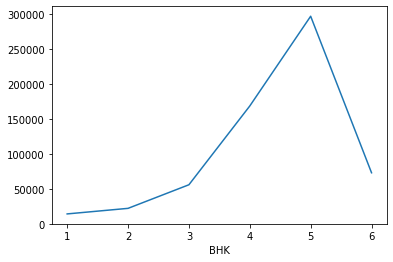

In [206]:
rent.groupby('BHK')['Rent'].mean().plot()


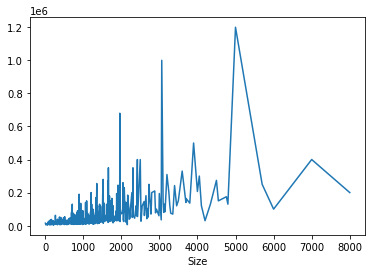

In [207]:
rent.groupby('Size')['Rent'].mean().plot()

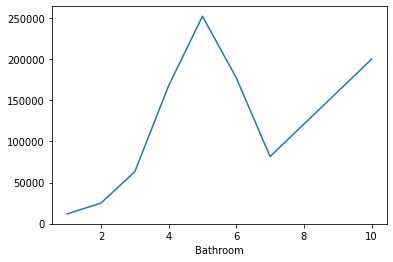

In [208]:
rent.groupby('Bathroom')['Rent'].mean().plot()

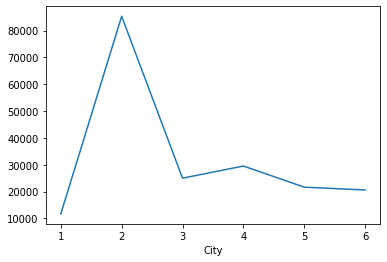

In [209]:
rent.groupby('City')['Rent'].mean().plot()

In [210]:
rent.columns

Index(['BHK', 'Rent', 'Size', 'Area_Type', 'City', 'Furnishing_Status',
       'Tenant_Preferred', 'Bathroom', 'Point_of_Contact', 'Floor_Level',
       'Floor_Max'],
      dtype='object')

there is linear relationship between target and feature and no outlier in the model.

MODEL

In [334]:
X=rent.loc[:,['Size','BHK','Point_of_Contact','Floor_Level','Floor_Max','Area_Type','Bathroom','Point_of_Contact','Furnishing_Status']].values
Y=rent.loc[:,'Rent'].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.8,random_state=22)

In [335]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [336]:
y_pred=regressor.predict(X_test)
y_pred.shape

(3794,)

In [337]:
from sklearn import metrics
metrics.r2_score(Y_test,y_pred)#to check te how much good my ML is

0.2529188673819378